In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

voters.head(106)


,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


In [ ]:
#The purpose of this project is to determine trends of how many people register to vote depending on the state they are from, and what year is being discussed.
#The goal is to determine the difference in people who registered to vote when looking at the whole nation in the data set, and the state of Arizona.
#It is important to read this notebook because it shows how people respond to certain canidates who are running, and how they may want to participate in voting based off that.




#1. What states have the highest and lowest average number of new registered voters?
#2. What Months and States correspond with the 3 datasets with the highest number of registered voters?

In [ ]:
voters.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

In [ ]:
voters.head(5)
#Jurisdiction refers to the State the data was collected from
#Year refers to the Year the data was collected from
#Month refers to the Month the data was collected from
#New registered voters refers to the amount of newly registered voters from the dataset

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [ ]:
voters.isnull().values.any()

False

In [ ]:
voters=voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


In [ ]:
#This data set does not include data based on how many people registered to vote in a given year or month. Calculating these numbers is something that has to be done on the side.

In [ ]:
voters.registered_voters.max()
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [ ]:
voters.registered_voters.mean()

48223.46226415094

In [ ]:
high_voters = voters.loc[voters.registered_voters > 48223]
high_voters.info()

#This happened 36 times



<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [ ]:
high_voters.NAME.value_counts()


,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


In [ ]:
High_AVG=voters.groupby("NAME")["registered_voters"].mean()
Top3=High_AVG.sort_values(ascending=False)
Top3.head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


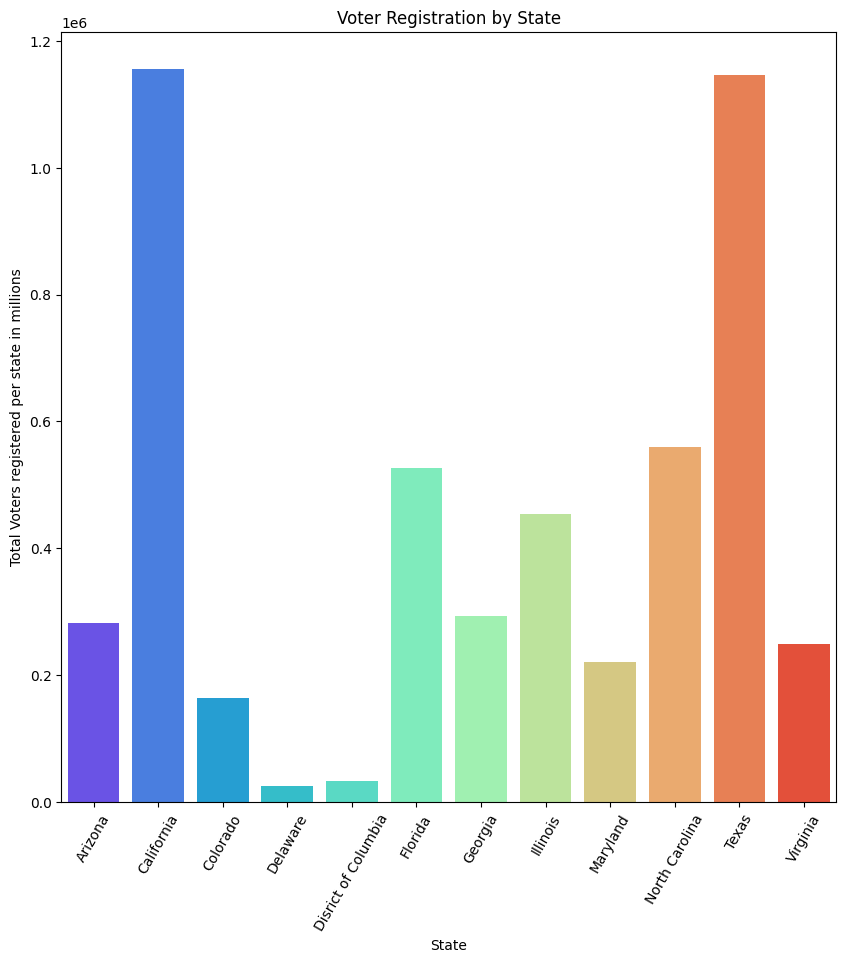

In [ ]:
voter_registration_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()

labels = ["Arizona", "California", "Colorado", "Delaware", "Disrict of Columbia", "Florida", "Georgia", "Illinois", "Maryland", "North Carolina", "Texas", "Virginia"]




plt.figure(figsize=(10,10))
sns.barplot(data=voter_registration_by_state,x="NAME",y="registered_voters", hue = "NAME", palette = "rainbow")
plt.xlabel("State")
plt.ylabel("Total Voters registered per state in millions")
plt.xticks(ticks= range(len(labels)), labels = labels, rotation = 60)
plt.title("Voter Registration by State")

#plt.legend(labels=[],title="")
plt.show()

#The highest average of new registered voters is in California, and it generally dominates when comapred to any other state, but mainly due to its large population size.

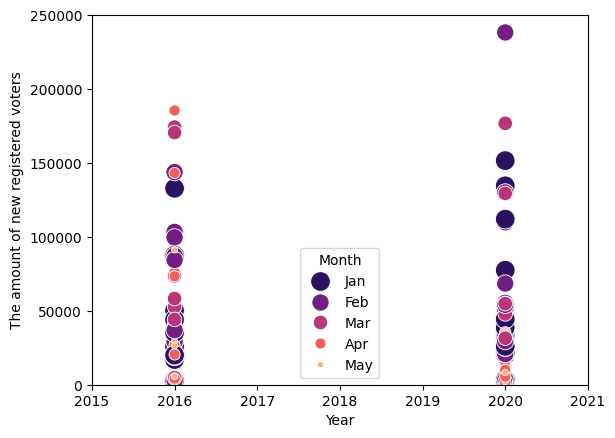

In [ ]:
comparison= voters[voters["Year"].isin(["2016","2022"])]

sixteen = voters.Year < 2017
twentytwo= voters.Year >2018

sns.scatterplot(voters, x="Year", y = "registered_voters", hue = "Month", palette = "magma",size="Month", sizes=(20, 200), legend="full")
plt.ylabel("The amount of new registered voters",fontsize=10)
plt.xlim(2015,2021)

plt.ylim(0,250000)

#plt.yscale("log")



#plt.grid()
plt.show()

#It seems that the month that had the most new registered voters in 2020 was Feburary, and in 2016 the month with the most registered voters was April. MarkDown Cell

In [ ]:
top_3 = voters.sort_values(by = "registered_voters", ascending=False).head(3)
top_3

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281
11,California,2016,Apr,185478
14,California,2020,Mar,176810


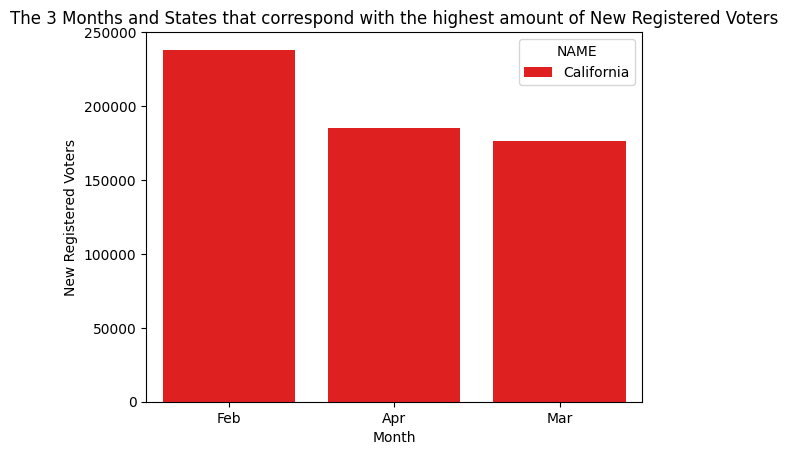

In [ ]:
sns.barplot(top_3, x = "Month", y = "registered_voters", hue = "NAME", palette= ["red"])
plt.title("The 3 Months and States that correspond with the highest amount of New Registered Voters")
plt.xlabel("Month")
plt.ylabel("New Registered Voters")

plt.show()


In [ ]:
!git clone https://github.com/SFord87/325-Datasets

shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
states.head()
#states.STUSPS.value_counts()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


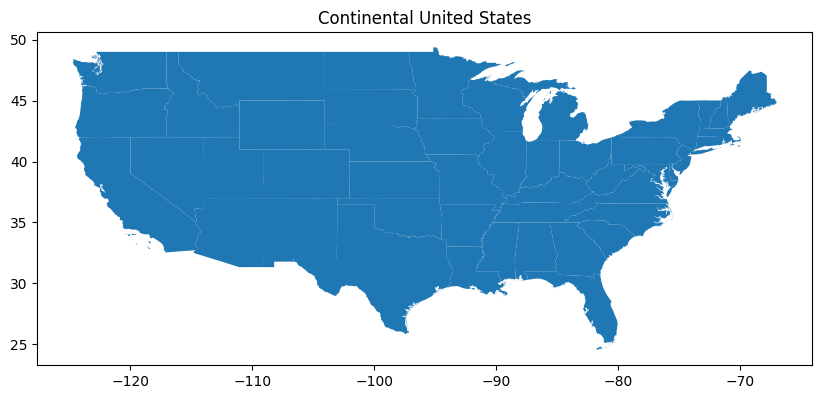

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.title("Continental United States")
plt.show()

In [ ]:

avgreg=voters.groupby("NAME")["registered_voters"].mean()

avgreg



,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


In [ ]:
map = bbox.merge(avgreg, on="NAME", how="inner")

In [ ]:
map

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


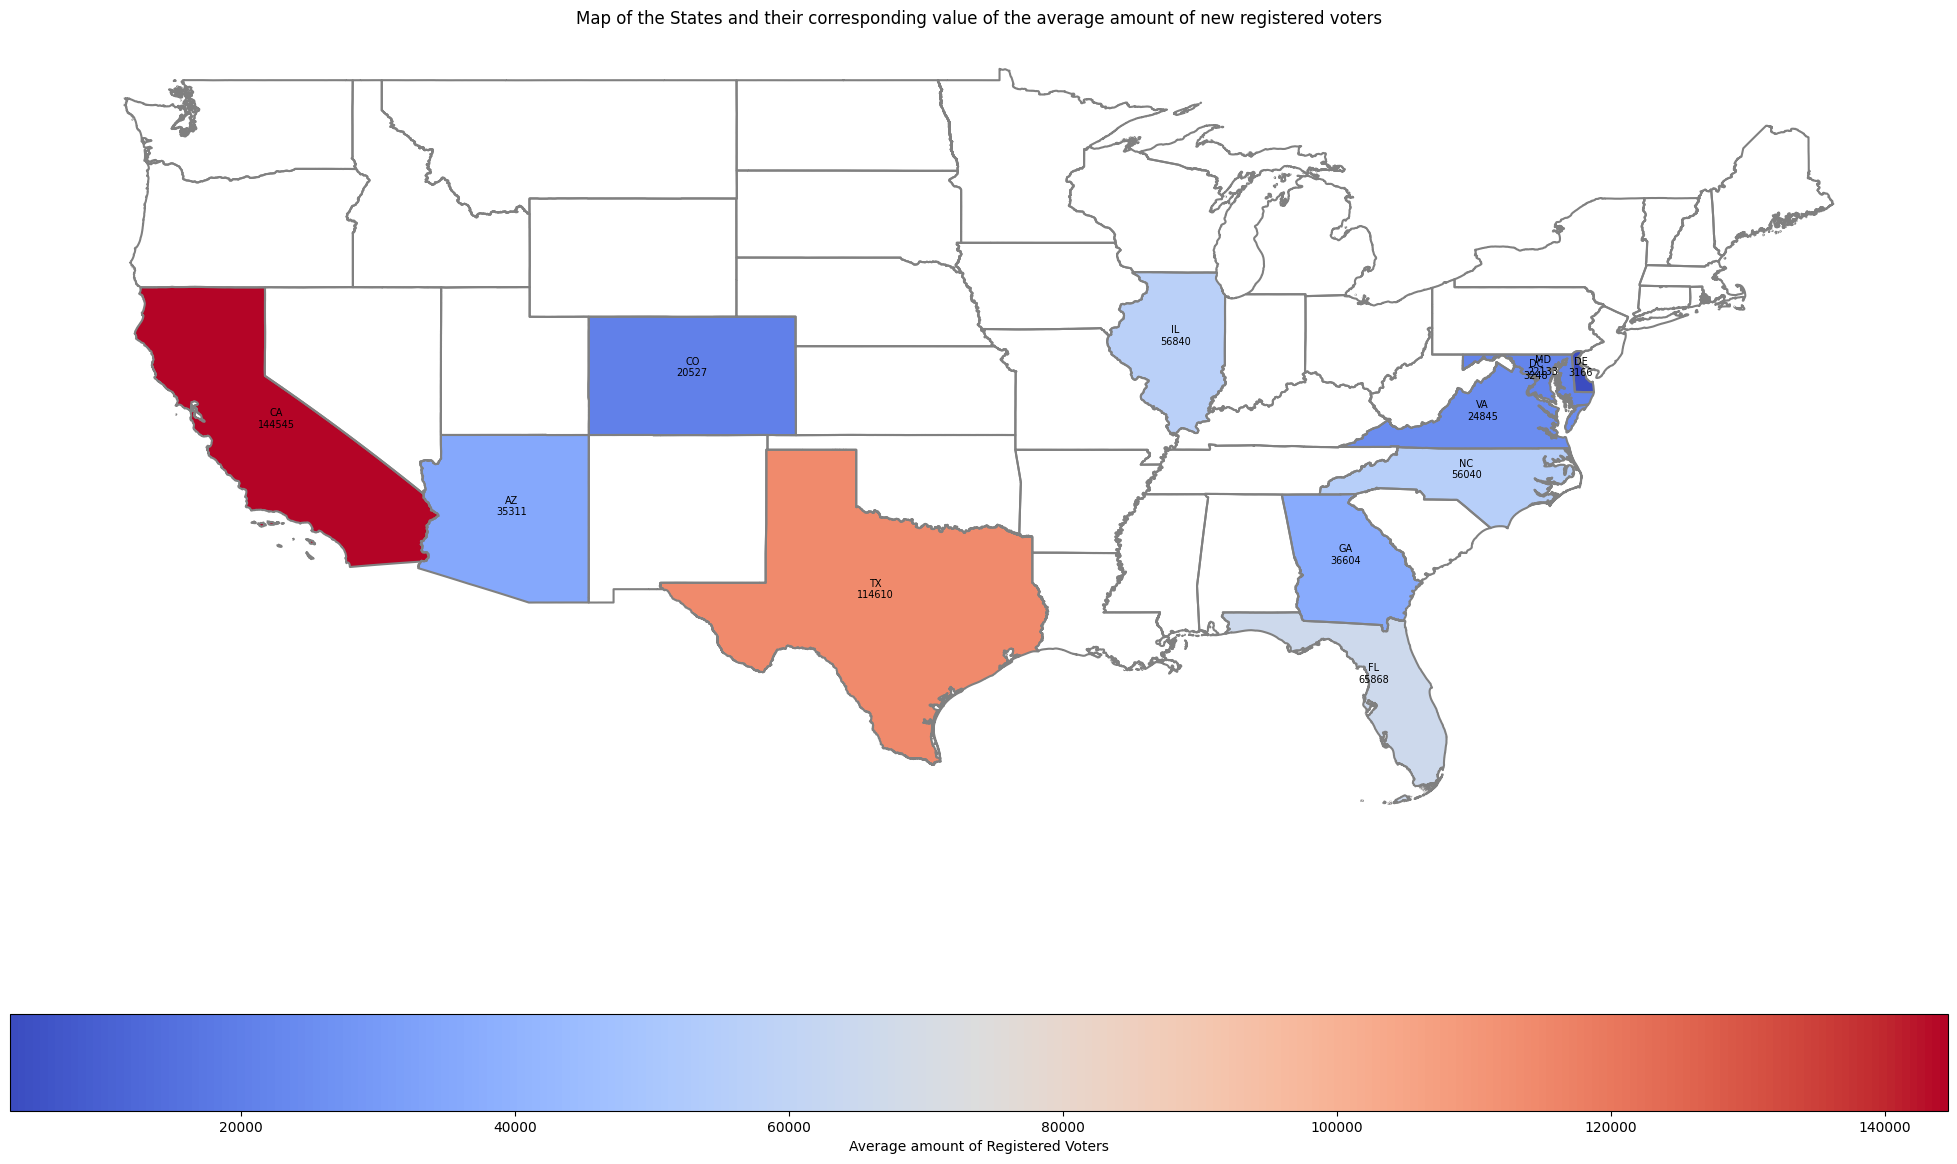

In [ ]:
us_map=bbox.boundary.plot(figsize=(25,15),color="gray")
map.plot(ax=us_map,color="red",linewidth=.25)
us_map.axis("off")

map.plot(column="registered_voters", ax=us_map, legend=True, cmap="coolwarm", linewidth=.25,
              legend_kwds={"label": "Average amount of Registered Voters", "orientation": "horizontal"})
map.apply(lambda x:us_map.annotate(
    text=x.STUSPS + "\n" + str(int(x.registered_voters)),
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=7), axis=1)
plt.title("Map of the States and their corresponding value of the average amount of new registered voters")
plt.show()